<a href="https://colab.research.google.com/github/franciscoescobarda/analysis-everpeak/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
df = pd.read_csv('/content/sprint7_webinar22_clinic_transactions.csv')

In [6]:
df.columns

Index(['transaction_id', 'customer_id', 'appointment_date', 'service_type',
       'appointment_channel', 'payment_method', 'amount_gross', 'discount_pct',
       'amount_net', 'is_refund', 'refund_reason', 'wait_time_min',
       'service_duration_min', 'satisfaction_score', 'signup_date', 'age',
       'gender', 'city', 'acquisition_channel', 'plan', 'has_insurance',
       'is_revenue'],
      dtype='object')

In [7]:
df["customer_segment"]=np.where(df["age"]>30,"Senior","Junior")
df[["customer_segment","age"]].tail()

,customer_segment,age
39995,Junior,29
39996,Senior,32
39997,Senior,32
39998,Senior,31
39999,Senior,40


In [8]:
df["customer_segment"]=np.where((df["age"]>30)&(df["amount_gross"]>10000),"Senior VIP","Otro"    )
df[["age","amount_gross","customer_segment"]].head()

,age,amount_gross,customer_segment
0,44,82231.0,Senior VIP
1,39,79034.0,Senior VIP
2,26,52059.0,Otro
3,18,144422.0,Otro
4,39,34207.0,Senior VIP


In [9]:
df["customer_segment"]=np.where((df["age"]>=30)&(df["amount_gross"]>50000),"Senior VIP",
                                np.where((df["age"]<30)&(df["amount_gross"]>50000),"Junior VIP","Otro" ))
df[["age","amount_gross","customer_segment"]].head()

,age,amount_gross,customer_segment
0,44,82231.0,Senior VIP
1,39,79034.0,Senior VIP
2,26,52059.0,Junior VIP
3,18,144422.0,Junior VIP
4,39,34207.0,Otro


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        40000 non-null  object 
 1   customer_id           40000 non-null  object 
 2   appointment_date      40000 non-null  object 
 3   service_type          40000 non-null  object 
 4   appointment_channel   40000 non-null  object 
 5   payment_method        40000 non-null  object 
 6   amount_gross          40000 non-null  float64
 7   discount_pct          40000 non-null  int64  
 8   amount_net            40000 non-null  float64
 9   is_refund             40000 non-null  int64  
 10  refund_reason         972 non-null    object 
 11  wait_time_min         40000 non-null  float64
 12  service_duration_min  40000 non-null  float64
 13  satisfaction_score    36879 non-null  float64
 14  signup_date           40000 non-null  object 
 15  age                

Las columnas amount_gross (float) y age (int) se analizaron porque permiten detectar patrones, distribuciones, valores atípicos útiles para el análisis.

In [12]:
num_cols=["amount_gross","age"]
df[num_cols].describe()

,amount_gross,age
count,40000.000000,40000.000000
mean,93295.393850,37.198200
std,52937.651339,22.584154
min,16925.000000,-3.000000
25%,54015.750000,28.000000
50%,78832.500000,36.000000
75%,118323.000000,44.000000
max,495138.000000,999.000000


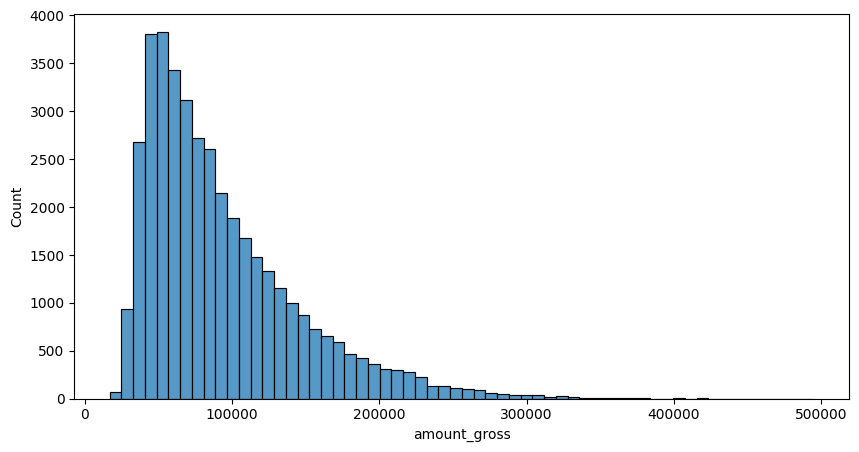

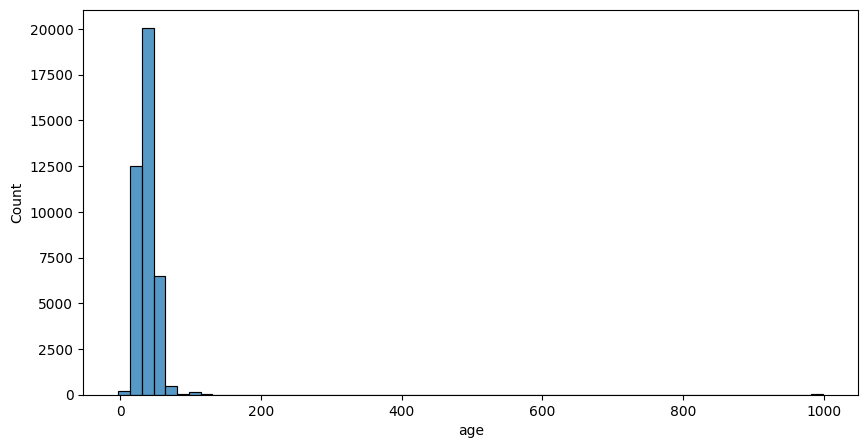

In [13]:
for cols in num_cols:
  plt.figure(figsize=(10,5))
  sns.histplot(df[cols],bins=60)
  plt.show()

<Axes: xlabel='amount_gross'>

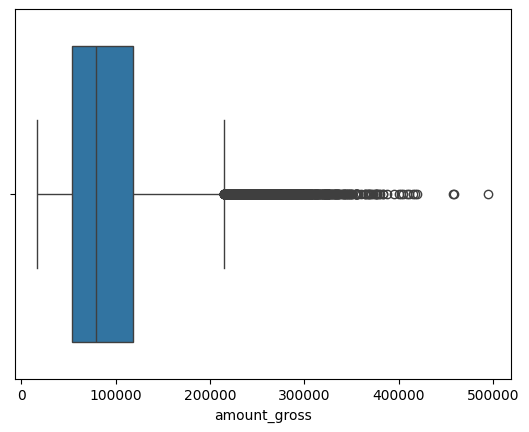

In [14]:
sns.boxplot(x=df["amount_gross"])